In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing   import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import font_manager, rc
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from fancyimpute import KNN    
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\Users\suer\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\suer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#rc('font', family='MHunmin')
fig_size=plt.rcParams["figure.figsize"]
#fig size in inches
fig_size[0]=10
fig_size[1]=8
df = pd.read_csv("C:/Users/suer/Dropbox/Restart/Restart5.csv", engine='python')
#df['센터인지'] = df['센터인지'].map({1:'예',2:'아니오'})
#df['프로그램인지'] = df['프로그램인지'].map({1:'예',2:'아니오'})
df['필요성'] = df['필요성'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['참여의사'] = df['참여의사'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [ ]:
"""
df['성별'] = df['성별'].map({1:'남성', 2:'여성'})
df['구분'] = df['구분'].map({1:'군복학', 2:'일반복학',3:'편입'})
df['휴학이유'] = df['휴학이유'].map({1:'군입대',2:'경제적문제',3:'학교불만족',4:'전공불일치',5:'취업준비',6:'심리적적응',7:'질병',8:'기타'})
df['어려운점1'] = df['어려운점1'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['어려운점2'] = df['어려운점2'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['어려운점3'] = df['어려운점3'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['도움1'] = df['도움1'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['도움2'] = df['도움2'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['도움3'] = df['도움3'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['진로계획'] = df['진로계획'].map({1:'취업',2:'고시준비',3:'대학원진학',4:'유학',5:'자영창업',6:'교직',7:'무계획',8:'무계획',9:'기타'})
df['도움대상1'] = df['도움대상1'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['도움대상2'] = df['도움대상2'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['도움대상3'] = df['도움대상3'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['불필요이유'] = df['불필요이유'].map({1:'무관심',2:'정보부족',3:'도움안됨',4:'부담됨',5:'기타'})
df['불참이유'] = df['불참이유'].map({1:'정보부족',2:'시간부족',3:'불필요',4:'낮가림등 적응문제',5:'도움안됨',6:'진로준비부족',7:'참여시과제부담',8:'기타'})
df['희망1'] = df['희망1'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})
df['희망2'] = df['희망2'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})
df['희망3'] = df['희망3'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})
"""

In [3]:
columns = df.columns
le = LabelEncoder()
df['학과'] = le.fit_transform(df['학과'])
df=df.replace(9999,np.NaN)
df = KNN(k=3).complete(df)
df = np.rint(df)
df= pd.DataFrame(data=df, columns=columns)

Imputing row 1/412 with 1 missing, elapsed time: 0.057
Imputing row 101/412 with 2 missing, elapsed time: 1.983
Imputing row 201/412 with 2 missing, elapsed time: 1.983
Imputing row 301/412 with 1 missing, elapsed time: 1.983
Imputing row 401/412 with 2 missing, elapsed time: 1.998


In [ ]:
df.describe()

In [4]:
len(df['학과'].unique())
df['성별'].unique()
np.where(df['성별']==3)

(array([], dtype=int64),)

In [ ]:
pd.crosstab(df['성별'],df['학년'],margins=True)

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['구분'], margins=True)

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['센터인지'], margins=True)

In [ ]:
pd.crosstab([df['성별'],df['구분']],df['프로그램인지'], normalize='index')

In [ ]:
pd.crosstab(df['학과'],df['도움1'],margins=True)

In [ ]:
pd.crosstab(df['성별'],df['도움1'],normalize='index')

In [ ]:
pd.crosstab(df['학년'],df['도움1'],normalize='index')

In [ ]:
pd.crosstab(df['학과'],df['도움대상1'],margins=True)

In [ ]:
pd.crosstab(df['휴학이유'],[df['성별'],df['학년']],margins=True)

In [ ]:
pd.crosstab(df['휴학이유'],[df['학년']],normalize='index')

In [ ]:
pd.crosstab(df['휴학이유'],[df['구분']],normalize='index')

In [ ]:
pd.crosstab(df['휴학이유'],[df['도움1']],normalize='index')

In [ ]:
pd.crosstab(df['휴학이유'],[df['성별']],margins=True)

In [ ]:
pd.crosstab(df['학년'],df['어려운점1'], normalize='index')

In [ ]:
pd.crosstab(df['휴학이유'],df['어려운점1'], normalize='index')

In [ ]:
pd.crosstab(df['휴학이유'],[df['성별']],normalize='index')

In [ ]:
df['휴학이유'].value_counts()

In [ ]:
sns.boxplot(x='휴학이유',y='어려운점1', data=df)

In [ ]:
sns.swarmplot(x='휴학이유',y='어려운점1', data=df)

In [ ]:
pd.crosstab(df['휴학이유'],df['어려운점3'],margins=True)

In [ ]:
pd.crosstab(df['휴학이유'],df['도움3'],margins=True)

In [ ]:
pd.crosstab(df['학년'],df['진로계획'],margins=True)

In [ ]:
pd.crosstab([df['학년'],],df['진로계획'],margins=True)

In [ ]:
pd.crosstab([df['학년'],],df['진로계획'],normalize='index')

In [ ]:
pd.crosstab([df['성별'],],df['진로계획'],normalize='index')

In [ ]:
pd.crosstab([df['학년'],df['성별']],df['진로계획'],normalize='index')

In [ ]:
pd.crosstab(df['학년'],df['필요성'],margins=True)

In [ ]:
pd.crosstab([df['성별']],df['도움1'],normalize='index')

In [ ]:
pd.crosstab([df['성별']],df['도움2'],normalize='index')

In [ ]:
pd.crosstab([df['성별']],df['도움3'],normalize='index')

In [ ]:
pd.crosstab([df['성별']],df['희망1'],normalize='index')

In [ ]:
pd.crosstab([df['학년']],df['희망1'],normalize='index')

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['희망2'],margins=True)

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['희망3'],margins=True)

In [ ]:
pd.crosstab([df['성별'],],df['상담회수'],margins=True)

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['상담회수'],margins=True)

In [ ]:
#sns.set(font_scale=2)
#sns.set_context("poster")
#sns.boxplot(x="학년", y="필요성", hue="성별", data=df)
#sns.boxplot(x='학년',y='필요성',data=df,hue='성별')
#plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
#plt.show()
fig = sns.boxplot(x="학년", y="필요성", hue="성별", data=df)
fig.figure.suptitle("학년별 필요성", fontsize = 24)
plt.xlabel('학년', fontsize=18)
plt.ylabel('필요성', fontsize=16)

In [ ]:
fig = sns.boxplot(x="학년", y="참여의사", hue="성별", data=df)
fig.figure.suptitle("학년별 참여의사", fontsize = 24)
plt.xlabel('학년', fontsize=18)
plt.ylabel('참여의사', fontsize=16)

In [ ]:
sns.distplot(df['어려운점1'])

In [ ]:
sns.boxplot(x='어려운점1', y='필요성', hue='성별', data=df)

In [ ]:
sns.boxplot(x='어려운점1', y='참여의사', hue='성별', data=df)

In [ ]:
sns.stripplot(x='학년', y='불필요이유', data=df)

In [ ]:
sns.boxplot(x='학년', y='불참이유', data=df,hue='성별')

In [ ]:
sns.boxplot(x='휴학이유',y='필요성', data=df,hue='성별')

In [ ]:
sns.boxplot(x='휴학이유',y='참여의사', data=df,hue='성별')

In [ ]:
pd.crosstab(df['성별'],df['어려운점1'],margins=True)

In [ ]:
pd.crosstab([df['센터인지'], df['성별']],[df['필요성'],df['참여의사']],margins=True)

In [ ]:
pd.crosstab([df['센터인지'], df['성별']],[df['참여의사']],margins=True)

In [ ]:
pd.crosstab([df['성별'],df['학년']],df['프로그램인지'] ,margins=True)

In [ ]:
sns.distplot(df['센터인지'])

In [ ]:
sns.barplot(x='센터인지',y='필요성',data=df, hue='성별')

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [5]:
feature = ['성별', '구분','학과','학년','휴학이유','어려운점1','어려운점2','어려운점3','도움2','도움3','도움대상1','도움대상2','도움대상3','진로계획','희망1','희망2','희망3','필요성','불필요이유','참여의사','불참이유']
target = ['도움1']
allfeature = ['성별', '구분','학과','학년','휴학이유','어려운점1','어려운점2','어려운점3','도움1','도움2','도움3','도움대상1','도움대상2','도움대상3','진로계획','희망1','희망2','희망3','필요성','불필요이유','참여의사','불참이유']

featuredata = df.loc[:,feature]
targetdata = df.loc[:,target]
data = np.c_[featuredata, targetdata]

nparraydata = df.loc[:,allfeature].as_matrix()

kp = KPrototypes(n_clusters=5, init='Huang', n_init=1, verbose=True)
#kp.fit_predict(data, categorical=[4])
kp.fit_predict(nparraydata, categorical=[5])
lbl = kp.labels_
lbl = pd.Series(lbl)
df['label'] = lbl
print(kp.cluster_centroids_)
print(kp.labels_)

C:\Users\suer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 102, ncost: 22224.077846979057
Run: 1, iteration: 2/100, moves: 21, ncost: 22094.293440091347
Run: 1, iteration: 3/100, moves: 12, ncost: 22052.052081331887
Run: 1, iteration: 4/100, moves: 3, ncost: 22041.871817448013
Run: 1, iteration: 5/100, moves: 0, ncost: 22041.871817448013
[array([[ 1.06818182,  1.27272727, 15.29545455,  2.44318182,  1.28409091,
         2.57954545,  3.42045455,  2.78409091,  2.95454545,  2.64772727,
         2.59090909,  3.19318182,  3.42045455,  4.39772727,  3.15909091,
         4.11363636,  4.56818182,  3.39772727,  2.79545455,  2.95454545,
         2.31818182],
       [ 1.05128205,  1.1025641 , 34.23076923,  2.65384615,  1.24358974,
         2.62820513,  3.51282051,  2.51282051,  3.06410256,  3.11538462,
         2.80769231,  3.07692308,  3.35897436,  1.61538462,  3.41025641,
         3.91025641,  3.8974359 ,  3.17948718,  2.70512821,  2.8974359 ,

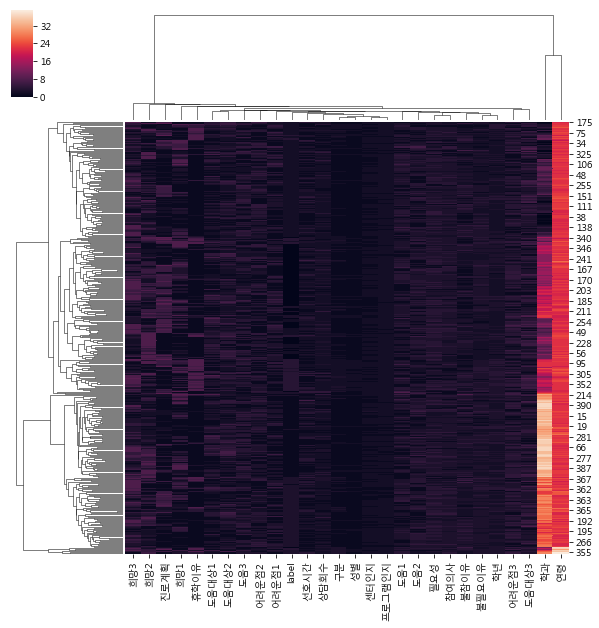

In [6]:
sns.clustermap(df)

In [ ]:
grp = df.groupby('label')

In [ ]:
grp.describe()

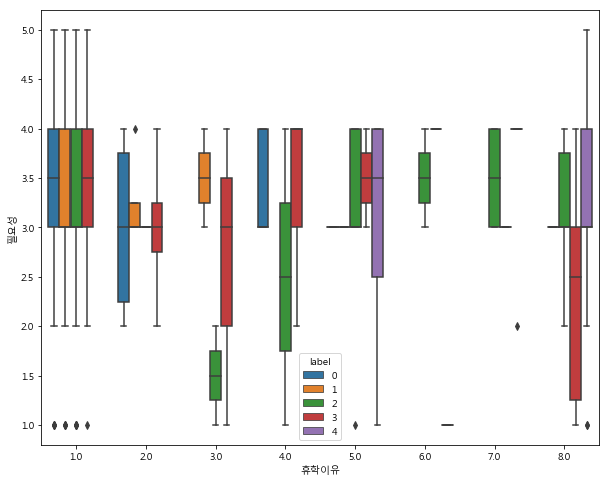

In [7]:
sns.boxplot(x='휴학이유',y='필요성', data=df,hue='label')

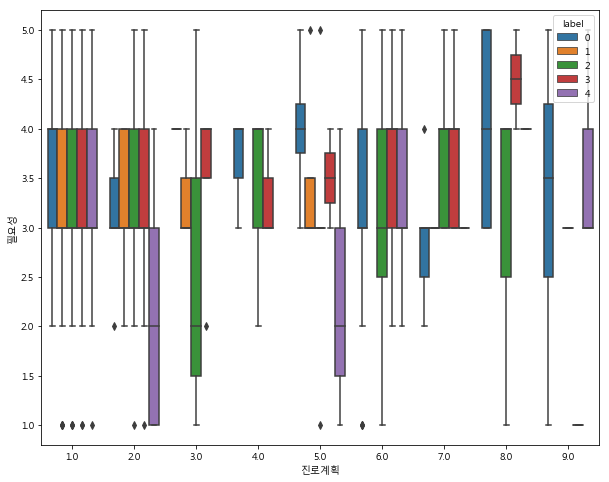

In [8]:
sns.boxplot('진로계획', '필요성', data=df, hue='label')

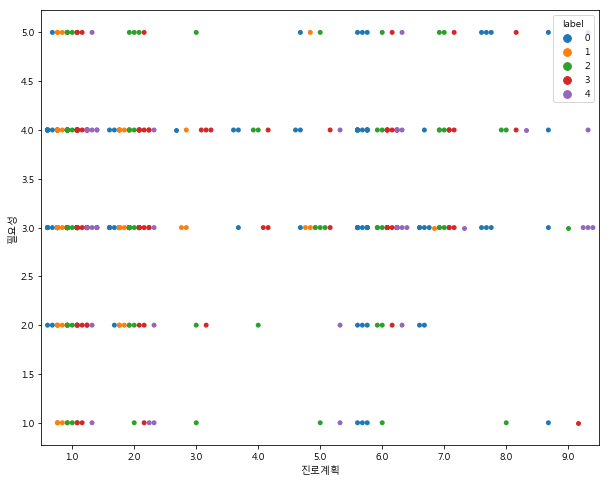

In [16]:
sns.swarmplot('진로계획', '필요성', data=df, hue='label', dodge=True)

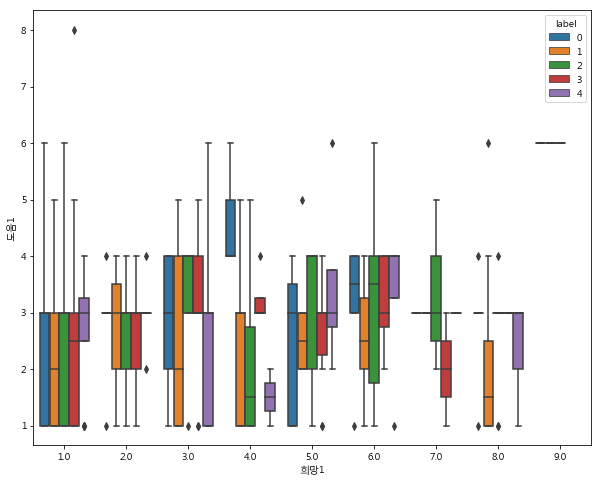

In [10]:
sns.boxplot(x='희망1',y='도움1',data=df, hue='label')

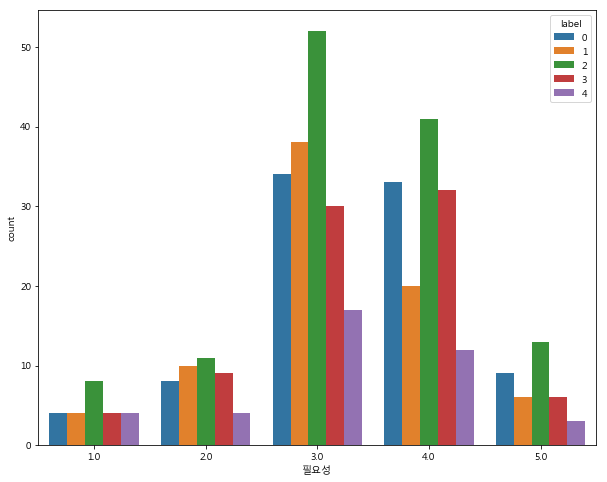

In [15]:
sns.countplot(x='필요성',data=df, hue='label')

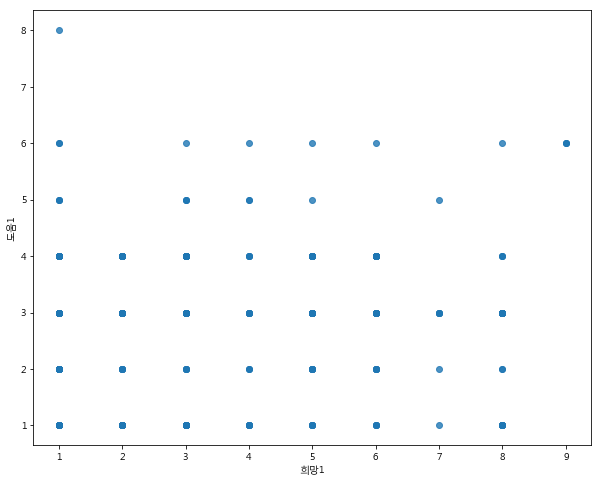

In [11]:
sns.regplot(x=df["희망1"], y=df["도움1"], fit_reg=False)

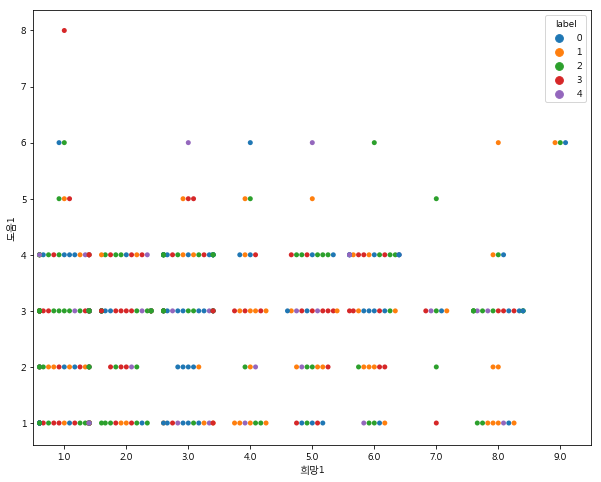

In [17]:
sns.swarmplot(x="희망1", y="도움1", hue="label", data=df)

In [ ]:
pd.crosstab(df['label'],[df['도움1'], df['희망1'], df['도움대상1']], margins=True)

In [ ]:
pd.crosstab(df['label'],[df['도움1']], normalize='index')

In [ ]:
pd.crosstab(df['label'],[df['도움대상1']], normalize='index')

In [ ]:
sns.swarmplot('희망1', '도움1', data=df, hue='label')

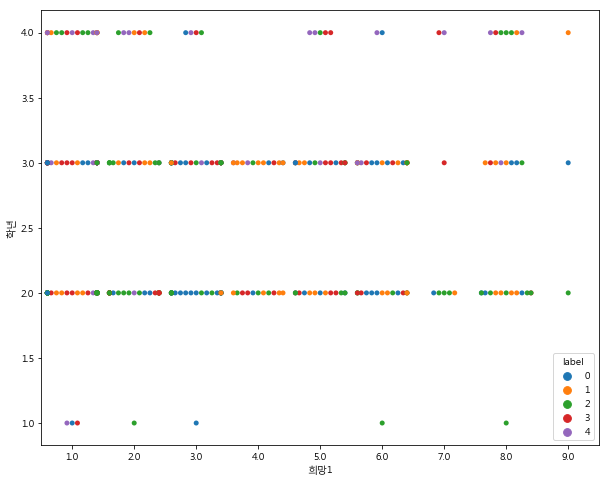

In [18]:
sns.swarmplot('희망1', '학년', data=df, hue='label')

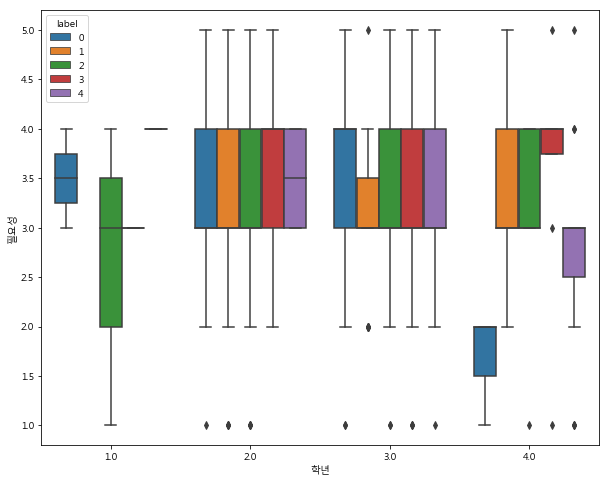

In [19]:
sns.boxplot(x='학년',y='필요성',data=df, hue='label')

In [ ]:
sns.boxplot('희망1', '도움1', data=df, hue='label')

In [ ]:
nparraydata.shape

In [ ]:
kp.cluster_centroids_

In [ ]:
"""
X = np.array(df.astype(float))
distortions = []
K = range(1,10)
for k in K:
    kp = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=1, verbose=True)
    kp.fit_predict(X, categorical=[k])
    distortions.append(sum(np.min(cdist(X, kp.cluster_centroids_,'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
"""

In [13]:
X = np.array(df.astype(float))
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KPrototypes(n_clusters=n_clusters, init='Huang', n_init=1, verbose=True)
    cluster_labels = clusterer.fit_predict(X,categorical=[n_clusters])
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 48, ncost: 34724.75743685782
Run: 1, iteration: 2/100, moves: 9, ncost: 34637.09799089015
Run: 1, iteration: 3/100, moves: 0, ncost: 34637.09799089015
For n_clusters = 2 The average silhouette_score is : 0.4027202915246832
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 89, ncost: 29863.88963149327
Run: 1, iteration: 2/100, moves: 46, ncost: 28827.666738101827
Run: 1, iteration: 3/100, moves: 9, ncost: 28777.591029329527
Run: 1, iteration: 4/100, moves: 0, ncost: 28777.591029329527
For n_clusters = 3 The average silhouette_score is : 0.28225707071007544
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 59, ncost: 27215.70913684146
Run: 1, iteration: 2/100, moves: 46, ncost: 26703.44823302676
Run: 1, iteration: 3/100, moves: 23, ncost: 26577.63410514

In [ ]:
temp = df.columns
i=-1
for x in df.columns:
    print(i+1, x)
    i=i+1

In [ ]:
cols = ['휴학이유', '어려운점1', '도움1', '진로계획', '필요성', '참여의사', '도움대상1', '희망1', '구분', '학과', '학년','성별', 'label']
cols2 = ['어려운점1', '도움1', '도움대상1', '희망1', '학년','성별', 'label']
cols3 = ['휴학이유', '진로계획', '필요성', '참여의사', '구분', '학과', 'label']
dfnew = df.ix[:,(2,3,6,9,10,12,14,18,22,23,25,26,27)].values
dfnew = pd.DataFrame(data=dfnew, columns= cols)
dfnew2 = df.ix[:,(3,6,14,18,25,26,27)].values
dfnew2 = pd.DataFrame(data=dfnew2, columns= cols2)
dfnew3 = df.ix[:,(2,9,10,12,22,23,27)].values
dfnew3 = pd.DataFrame(data=dfnew3, columns= cols3)
sns.pairplot(dfnew2, kind="scatter", hue="label", markers=["o", "s"], palette="Set2")

In [ ]:
sns.pairplot(dfnew, kind="scatter", hue="label", markers=["o", "s"], palette="Set2")

In [ ]:
sns.pairplot(dfnew3, kind="scatter", hue="label", markers=["o", "s"], palette="Set2")

In [ ]:
cols4 = ['센터인지','프로그램인지','휴학이유','불필요이유','불참이유','선호시간','상담회수','구분','연령', 'label']
dfnew4 = df.ix[:,(0,1,2,11,13,17,21,22,24,27)].values
dfnew4 = pd.DataFrame(data=dfnew4, columns= cols4)
cols41 = ['센터인지','프로그램인지','휴학이유','불필요이유','label']
dfnew41 = df.ix[:,(0,1,2,11,27)].values
dfnew41 = pd.DataFrame(data=dfnew41, columns= cols41)
cols42 = ['불참이유','선호시간','상담회수','구분','연령', 'label']
dfnew42 = df.ix[:,(13,17,21,22, 24,27)].values
dfnew42 = pd.DataFrame(data=dfnew, columns= cols42)
sns.pairplot(dfnew4, kind="scatter", hue="label", markers=["o", "s"], palette="Set2")

In [ ]:
sns.clustermap(dfnew)

In [ ]:
sns.clustermap(dfnew2)

In [ ]:
sns.clustermap(dfnew3)

In [ ]:
sns.clustermap(dfnew4)

In [ ]:
sns.clustermap(df)

In [ ]:
sns.clustermap(df[df.label==0])

In [ ]:
sns.clustermap(df[df.label==1])

In [ ]:
df.head()

In [ ]:
pd.crosstab(df.label,df['어려운점1'], margins=True)

In [ ]:
pd.crosstab(df.label,df['성별'], normalize='index')

In [ ]:
pd.crosstab([df['label'], df['성별']],df['학년'], normalize='index')

In [ ]:
pd.crosstab([df.label,df['성별']],df['도움1'], normalize='index')

In [ ]:
pd.crosstab([df.label,df['성별']],df['도움대상1'], normalize='index')

In [ ]:
pd.crosstab([df.label,df['성별']],df['희망1'], normalize='index')

In [ ]:
pd.crosstab(df.label,df['department'])

In [ ]:
df['department'] = le.inverse_transform(df['학과'].astype(int))

In [ ]:
df['department']

In [ ]:
writer = pd.ExcelWriter('C:/Users/suer/Dropbox/Restart/restart.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
list(le.classes_)